# Simple and Multiple Linear Regression


AKA - Welcome to statistical modeling! Could also say - welcome to **Supervised Machine Learning**.

What do I mean by 'Supervised' ?

![Types of machine learning, broken down](images/machinelearning_supervisedunsupervised.png)
 
[Image Source](https://fr.mathworks.com/help/stats/machine-learning-in-matlab.html)

## Today's Goals:

- Recognize the importance of model validation
- Implement a train-test split
- Evaluate a simple linear regression model
- Add additional variables to create a multiple linear regression model
- Scale features appropriately, based on training data, for a multiple linear regression model

Bonus, if we have time: other useful metrics for regression models!

### First: Set Up

In [1]:
# Basic imports
import numpy as np
import pandas as pd
# Data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# Modeling!
from statsmodels.formula.api import ols

Credit data from https://www.kaggle.com/avikpaul4u/credit-card-balance

Target: `Balance`

In [2]:
# Data
df = pd.read_csv('data/Credit.csv', 
                 usecols=['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Balance'])

In [3]:
df.head()

,Income,Limit,Rating,Cards,Age,Balance
0,14.891,3606,283,2,34,333
1,106.025,6645,483,3,82,903
2,104.593,7075,514,4,71,580
3,148.924,9504,681,3,36,964
4,55.882,4897,357,2,68,331


In [4]:
df.describe()

,Income,Limit,Rating,Cards,Age,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,1999.000000


## Model Validation - AKA How to Build Generalizable Models

![validation gif from giphy](https://media.giphy.com/media/242wLqQerWkxd6GgHB/giphy.gif)

### The Bias-Variance Trade Off

<img alt="original image from https://rmartinshort.jimdofree.com/2019/02/17/overfitting-bias-variance-and-leaning-curves/" src="images/underfit-goodfit-overfit.png" width=750, height=350>  

## How To Minimize Bias and Variance

### Combat Underfitting (Bias)

**Bias**: Error introduced by approximating a real-life problem (which may be extremely complicated) by a much simpler model (because the model is too simple to capture the underlying pattern)

**The Solution:** evaluate the performance of our models, using a scoring metric, which will help us catch if a model is underfit - if it's performing quite poorly, it probably isn't capturing the relationship in our data! 

### Combat Overfitting (Variance)

**Variance**: Amount by which our model would change if we estimated it using a different training dataset (because the model is over-learning from the training data)

**The Solution:** don't train your model on ALL of your data, but keep some of it in reserve to test on, in order to simulate how it will work on new/incoming data.


<img alt="original image from https://www.dataquest.io/wp-content/uploads/kaggle_train_test_split.svg plus some added commentary" src="images/traintestsplit_80-20.png" width=650, height=150>  

How does this fight against overfitting? By witholding data from the training process, we are testing whether the model actually _generalizes_ well. If it does poorly on the test set, it's a good sign that our model learned too much noise from the train set and is overfit! 

![arrested development gif, found by Andy](https://heavy.com/wp-content/uploads/2013/05/tumblr_mjm9fqhrle1rvnnvyo6_250.gif)

#### Practice:

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [6]:
# Importing the train_test_split function from sklearn
from sklearn.model_selection import train_test_split

In [7]:
# Need to define our X and y
X = df.drop(columns='Balance')
y = df['Balance']

In [8]:
print(X.shape)
X.head()

(400, 5)


,Income,Limit,Rating,Cards,Age
0,14.891,3606,283,2,34
1,106.025,6645,483,3,82
2,104.593,7075,514,4,71
3,148.924,9504,681,3,36
4,55.882,4897,357,2,68


In [9]:
print(y.shape)
y.head()

(400,)


0    333
1    903
2    580
3    964
4    331
Name: Balance, dtype: int64

In [10]:
# Train test split here!
# Set test_size = .33
# Set random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

What did that do?

In [11]:
X_train.shape

(268, 5)

In [12]:
X_test.shape

(132, 5)

In [13]:
len(X_train + X_test) == len(X)

True

In [14]:
X_train.head()

,Income,Limit,Rating,Cards,Age
258,41.400,2561,215,2,36
177,22.379,3965,292,2,34
119,23.012,1410,137,3,81
194,30.406,2120,181,2,79
229,69.943,7555,547,3,76


In [16]:
y_train.head()

258       0
177     384
119       0
194       0
229    1058
Name: Balance, dtype: int64

In [17]:
X_train.index == y_train.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

**YOU SHOULD ALWAYS START WITH A TRAIN TEST SPLIT.**

**FOR THE PROJECT, YOU WILL BE _REQUIRED_ TO WORK WITH A TRAIN TEST SPLIT**

Note - for the checkpoints and code challenge, follow the instructions given - they might not require a train/test split as they attempt to keep thing simple.

BUT we're going to use it in this session! Let's see what this looks like in practice!

In [18]:
# For statsmodels, we'll create a train_df and test_df
train_df = pd.concat([X_train, y_train], axis=1)

test_df = pd.concat([X_test, y_test], axis=1)

In [19]:
# We'll use the training data to make any modeling decisions!
train_df.head()

,Income,Limit,Rating,Cards,Age,Balance
258,41.400,2561,215,2,36,0
177,22.379,3965,292,2,34,384
119,23.012,1410,137,3,81,0
194,30.406,2120,181,2,79,0
229,69.943,7555,547,3,76,1058


## Simple Linear Regression

Let's start off with one variable - which should we choose?

<Figure size 432x432 with 0 Axes>

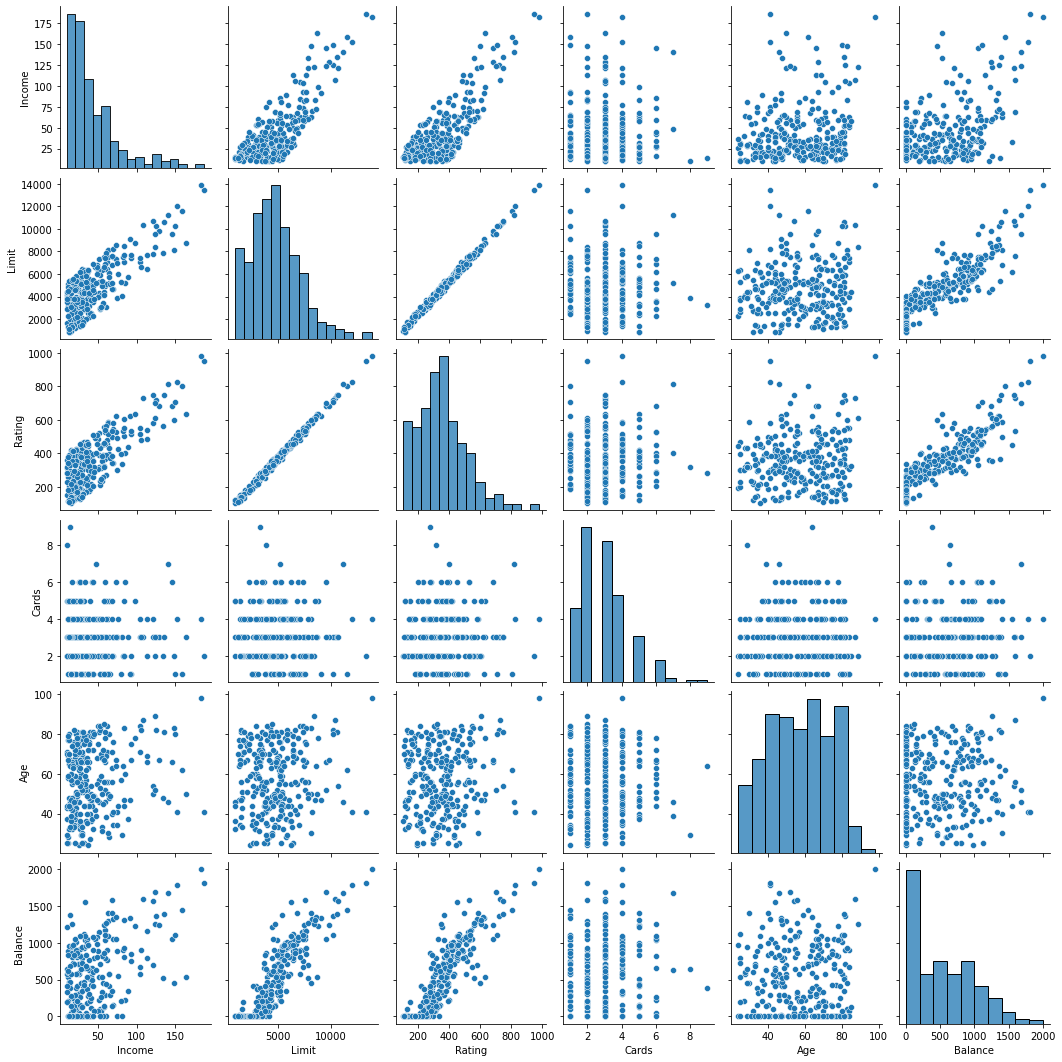

In [22]:
# Code to evaluate our options
plt.figure(figsize=(6,6))
sns.pairplot(train_df)

Our choice:

- Rating!


### Time to Model!

In [23]:
train_df.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Balance'], dtype='object')

In [25]:
# Set up your formula
simple_formula = 'Balance ~ Rating'

In [30]:
# Set up and fit your model
simple_model = ols(formula=simple_formula, data=train_df).fit()

In [31]:
# Check your results!
simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     919.7
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           2.59e-88
Time:                        15:04:00   Log-Likelihood:                -1830.3
No. Observations:                 268   AIC:                             3665.
Df Residuals:                     266   BIC:                             3672.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -399.0605     33.857    -11.787      0.000    -465.723    -332.398
Rating         2.6205      0.086     30.327      0.000       2.450       2.791
==============================================================================
Omnibus:                       17.496   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.301
Skew:                           0.333   Prob(JB):                     3.56e-08
Kurtosis:                       4.621   Cond. No.                         967.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Evaluate!

- R2 = .776 - this model accounts for 77.6% of the variance in Balance


### Now what?

We have a trained model... what can we do with it?

In [32]:
# Get our predictions!
simple_train_preds = simple_model.predict(train_df['Rating'])
simple_train_preds

258     164.340226
177     366.116296
119     -40.056312
194      75.244300
229    1034.335746
          ...     
71     1010.751530
106     -97.706617
270     169.581163
348    -105.568022
102     992.408251
Length: 268, dtype: float64

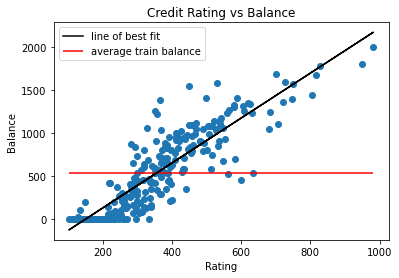

In [38]:
# Just looking at two variables... we can visualize this!

# Plot our points as a scatterplot
plt.scatter(train_df['Rating'], train_df['Balance'])
# Plot the line of best fit!
plt.plot(train_df['Rating'], simple_train_preds, color='black', label='line of best fit')

plt.hlines(y=train_df['Balance'].mean(), color='red', label='average train balance',
           xmin=train_df['Rating'].min(), xmax=train_df['Rating'].max())

plt.ylabel('Balance')
plt.xlabel('Rating')
plt.title('Credit Rating vs Balance')
plt.legend()
plt.show()

In [39]:
# Compare to our actual train values...
train_residuals = y_train - simple_train_preds
train_residuals

258   -164.340226
177     17.883704
119     40.056312
194    -75.244300
229     23.664254
          ...    
71      92.248470
106     97.706617
270    -33.581163
348    105.568022
102    594.591749
Length: 268, dtype: float64

We can score our models without relying on the statsmodels output!

https://scikit-learn.org/stable/modules/model_evaluation.html

In [40]:
# Can use sklearn to score our model, too:
from sklearn.metrics import r2_score

# Score our training data - the same score as from our summary!
# This function requires two inputs: y_true and y_pred:
r2_score(y_train, simple_train_preds)

0.7756660731253149

In [41]:
# Can now predict for our test set!
simple_test_preds = simple_model.predict(test_df['Rating'])
simple_test_preds

209    1283.280247
280     588.856112
33       25.455399
210     237.713342
93      617.681265
          ...     
332     588.856112
167      67.382894
245      96.208047
311     638.645012
145     494.519249
Length: 132, dtype: float64

In [42]:
# Score our testing data
r2_score(y_test, simple_test_preds)

0.6656804809053132

### Evaluate:

- sign of overfitting? doing better on training data than on test 


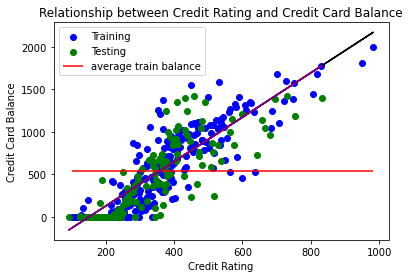

In [69]:

# One last thing - can visualize both train and test set!

# Plot our training data
plt.scatter(train_df['Rating'], train_df['Balance'], color='blue', label='Training')
# Plot our testing data
plt.scatter(test_df['Rating'], test_df['Balance'], color='green', label='Testing')


# Plot the line of best fit
plt.plot(train_df['Rating'], simple_train_preds, color='black')
# Plotting for the test data just to show it's the same!
plt.plot(test_df['Rating'], simple_test_preds, color='purple')
# And plotting our dumb model-less baseline: aka what it'd look like to predict just the mean
plt.hlines(y=train_df['Balance'].mean(), color='red', label='average train balance',
           xmin=train_df['Rating'].min(), xmax=train_df['Rating'].max())

plt.ylabel('Credit Card Balance')
plt.xlabel('Credit Rating')
plt.title('Relationship between Credit Rating and Credit Card Balance')
plt.legend()
plt.show()

## Multiple Linear Regression

Same as simple linear regression, but with more inputs!

In [43]:
# Define our formula
# First, define a list of X columns...
X_cols = list(X_train.columns)

In [46]:
# ... Then use that list to make our formula, using join
formula = 'Balance ~ ' + " + ".join(X_cols)

In [47]:
formula

'Balance ~ Income + Limit + Rating + Cards + Age'

In [48]:
# Set up and fit your model
model = ols(formula=formula, data=train_df).fit()

In [49]:
# Check your results!
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     410.8
Date:                Tue, 28 Sep 2021   Prob (F-statistic):          9.85e-122
Time:                        15:23:56   Log-Likelihood:                -1738.6
No. Observations:                 268   AIC:                             3489.
Df Residuals:                     262   BIC:                             3511.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -419.8589     49.920     -8.411      0.000    -518.155    -321.563
Income        -7.1456      0.479    -14.921      0.000      -8.089      -6.203
Limit          0.2013      0.063      3.216      0.001       0.078       0.325
Rating         0.8536      0.939      0.909      0.364      -0.996       2.703
Cards         21.7044      8.272      2.624      0.009       5.417      37.992
Age           -0.9132      0.595     -1.536      0.126      -2.084       0.258
==============================================================================
Omnibus:                       62.981   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.460
Skew:                           1.330   Prob(JB):                     2.07e-23
Kurtosis:                       4.509   Cond. No.                     2.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
X_train.head()

,Income,Limit,Rating,Cards,Age
258,41.400,2561,215,2,36
177,22.379,3965,292,2,34
119,23.012,1410,137,3,81
194,30.406,2120,181,2,79
229,69.943,7555,547,3,76


#### Observation time!

How'd we do? What looks different from the simple linear regression output? What in the world can we do with those coefficients?

- Better! R2 = .887


## Standardization, AKA Feature Scaling and Centering

Scaling data is the process of **increasing or decreasing the magnitude according to a fixed ratio.** You change the size but not the shape of the data. Often, this involves dividing features by their standard deviation.

Centering also does not change the shape of the data, but instead simply **removes the mean value  of each feature** so that each is centered around zero instead of their original mean.

The idea is that you can standardize data so that a model can interpret each individual feature more consistently.

Documentation: https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler

We've seen one of these options before - when else did we remove the mean and then divide by the standard deviation?

- z-score!


In [53]:
# Import the relevant scaler
from sklearn.preprocessing import StandardScaler

In [54]:
# Instantiating our scaler
stdscaler = StandardScaler()

# Creating scaled versions of one column
age_scaled = stdscaler.fit_transform(train_df[['Age']]) # pass Age col as a df
# Why fit_transform? We'll discuss in a second

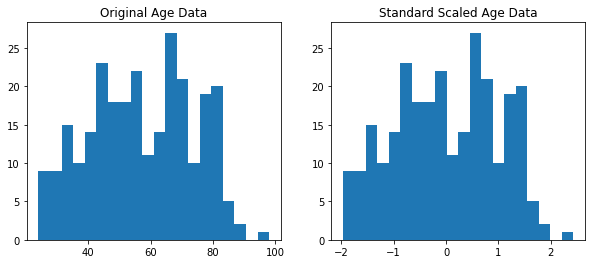

In [55]:
# Visualize them!
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10,4))
# Original data
ax1.hist(train_df['Age'], bins=20)
ax1.set_title("Original Age Data")
# Scaled data
ax2.hist(age_scaled, bins=20)
ax2.set_title("Standard Scaled Age Data")

plt.show()

In [56]:
train_df['Age'].mean()

57.134328358208954

### What Changed?

- x values: went from 18-100 to -2 - 2


### Why do we need to use feature scaling?

- In order to compare the magnitude of coefficients thus increasing the interpretability of coefficients
- Handling disparities in units
- Some models use euclidean distance in their computations
- Some models require features to be on equivalent scales
- In the machine learning space, it helps improve the performance of the model and reducing the values/models from varying widely
- Some algorithms are sensitive to the scale of the data

### `fit_transform` ?

Note above we used `fit_transform` - why is that? **Consistency!**

`fit` allows the scaler to learn the patterns _only from the training data_! 

Why does that matter?

- mean and standard deviation are affected by the data in the rows - so, if we fit to the whole dataset instead of just the training data, the scaler would learn patterns influenced by the test data!

`transform` allows the scaler to apply the pattern it learns - can do so on both the train and test sets, so long as they're equivalent (aka have the same columns and were prepared the same way!)

**ALWAYS FIT ON TRAINING DATA, THEN TRANSFORM THE TRAIN AND TEST SETS!**

### Let's Try It

In [57]:
# Instantiate a new scaler
scaler = StandardScaler()
# Learn the pattern from the training data
scaler.fit(X_train)
#Apply the pattern to the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
# What is this object?
X_train_scaled

array([[-0.10104321, -0.93872476, -0.90189213, -0.66979782, -1.25818834],
       [-0.65506615, -0.34489606, -0.41699176, -0.66979782, -1.37725418],
       [-0.63662882, -1.42554587, -1.39308991,  0.02596116,  1.42079318],
       ...,
       [-0.84476971, -0.71709638, -0.88929732, -1.3655568 , -1.07958957],
       [-0.91563548, -1.54228142, -1.5505251 ,  0.02596116,  0.76593103],
       [ 0.69450007,  1.18493186,  1.08808861, -0.66979782, -0.06752988]])

In [59]:
# What's that look like as a dataframe?
X_train_scaled = pd.DataFrame(X_train_scaled,
                              columns=X_train.columns,
                              index=X_train.index)

X_train_scaled.head()

,Income,Limit,Rating,Cards,Age
258,-0.101043,-0.938725,-0.901892,-0.669798,-1.258188
177,-0.655066,-0.344896,-0.416992,-0.669798,-1.377254
119,-0.636629,-1.425546,-1.393090,0.025961,1.420793
194,-0.421264,-1.125248,-1.116004,-0.669798,1.301727
229,0.730326,1.173512,1.188847,0.025961,1.123129


In [60]:
#Let's make train_df_scaled, which includes the target variable, for statsmodels
train_df_scaled = pd.concat([X_train_scaled, y_train], axis=1)

In [61]:
train_df_scaled

,Income,Limit,Rating,Cards,Age,Balance
258,-0.101043,-0.938725,-0.901892,-0.669798,-1.258188,0
177,-0.655066,-0.344896,-0.416992,-0.669798,-1.377254,384
119,-0.636629,-1.425546,-1.393090,0.025961,1.420793,0
194,-0.421264,-1.125248,-1.116004,-0.669798,1.301727,0
229,0.730326,1.173512,1.188847,0.025961,1.123129,1058
...,...,...,...,...,...,...
71,0.405212,1.108800,1.132170,-0.669798,1.420793,1103
106,-0.817012,-1.456422,-1.531633,-0.669798,1.004063,0
270,-0.844770,-0.717096,-0.889297,-1.365557,-1.079590,136
348,-0.915635,-1.542281,-1.550525,0.025961,0.765931,0


In [62]:
# Our formula stays the same
formula

'Balance ~ Income + Limit + Rating + Cards + Age'

In [63]:
# Set up and fit your model
scaled_model = ols(formula=formula, data= train_df_scaled).fit()

In [65]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     410.8
Date:                Tue, 28 Sep 2021   Prob (F-statistic):          9.85e-122
Time:                        15:43:27   Log-Likelihood:                -1738.6
No. Observations:                 268   AIC:                             3489.
Df Residuals:                     262   BIC:                             3511.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -419.8589     49.920     -8.411      0.000    -518.155    -321.563
Income        -7.1456      0.479    -14.921      0.000      -8.089      -6.203
Limit          0.2013      0.063      3.216      0.001       0.078       0.325
Rating         0.8536      0.939      0.909      0.364      -0.996       2.703
Cards         21.7044      8.272      2.624      0.009       5.417      37.992
Age           -0.9132      0.595     -1.536      0.126      -2.084       0.258
==============================================================================
Omnibus:                       62.981   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.460
Skew:                           1.330   Prob(JB):                     2.07e-23
Kurtosis:                       4.509   Cond. No.                     2.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
# Check your results!
scaled_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     410.8
Date:                Tue, 28 Sep 2021   Prob (F-statistic):          9.85e-122
Time:                        15:43:18   Log-Likelihood:                -1738.6
No. Observations:                 268   AIC:                             3489.
Df Residuals:                     262   BIC:                             3511.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    539.6343      9.817     54.967      0.000     520.303     558.965
Income      -245.3279     16.442    -14.921      0.000    -277.703    -212.953
Limit        475.8959    147.989      3.216      0.001     184.498     767.294
Rating       135.5443    149.144      0.909      0.364    -158.129     429.218
Cards         31.1953     11.889      2.624      0.009       7.785      54.605
Age          -15.3400      9.989     -1.536      0.126     -35.008       4.328
==============================================================================
Omnibus:                       62.981   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.460
Skew:                           1.330   Prob(JB):                     2.07e-23
Kurtosis:                       4.509   Cond. No.                         35.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Evaluate:

What changed?

- coefficients

What didn't change?
- R2 score
- p-value estimation for each input variable


### Also - how do we interpret these coefficients, or those p-values in the summary?

Discuss:

- Can now compare coefficients cause they're on the same scale
- More robust starting place from which to evaluate which features to keep/drop


### Next Step?

What could we do next to improve this model?

- Could remove irrelevant columns, especially multicollinear columns (like rating/limit)


In [66]:
# Check out a potential issue in our model?
X_train.corr()

,Income,Limit,Rating,Cards,Age
Income,1.000000,0.793190,0.793567,-0.006620,0.169410
Limit,0.793190,1.000000,0.996819,0.029687,0.092690
Rating,0.793567,0.996819,1.000000,0.073965,0.093269
Cards,-0.006620,0.029687,0.073965,1.000000,0.016590
Age,0.169410,0.092690,0.093269,0.016590,1.000000


An important note to keep in mind from now on:

!["all models are wrong but some are useful" quote picture](images/allmodelsarewrong.jpg)

[Image Source](https://twitter.com/cwodtke/status/1244433603666178049)

### Additional Resources:

- [Excellent statistical writeup about how to interpret Linear Regression coefficients, and their p-values](https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/)
- [Great bias/variance infographic](https://elitedatascience.com/bias-variance-tradeoff) from Elite Data Science

## Extra Credit: Beyond the $R^2$ Score

There are other metrics! 

#### Mean Absolute Error (MAE)

$$\text{MAE}(y, y_\text{pred}) = \frac{1}{n} \sum_{i=0}^{n} \left| y_i - y_\text{pred}i \right|$$

- Measures the average magnitude of errors regardless of direction, by calculating the total absolute value of errors and dividing by the number of samples (number of predictions made)
- **This error term is in the same units as the target!**

#### Mean Squared Error (MSE)

$$\text{MSE}(y, y_\text{pred}) = \frac{1}{n} \sum_{i=0}^{n} (y_i - y_\text{pred}i)^2$$

- Measures the average squared error, by calculating the sum of squared errors for all predictions then dividing by the number of samples (number of predictions)
- In other words - this is the Residual Sum of Squares (RSS) divided by the number of predictions!
- This error term is **NOT** in the same units as the target!

#### Root Mean Squared Error (RMSE)

$$\text{RMSE}(y, y_\text{pred}) = \sqrt{\frac{1}{n} \sum_{i=0}^{n} (y_i - y_\text{pred}i)^2}$$

- Measures the square root of the average squared error, by calculating the sum of squared errors for all predictions then dividing by the number of samples (number of predictions), then taking the square root of all that
- **This error term is in the same units as the target!**

Note - before, we were _maximizing_ R2 (best fit = largest R2 score). But we'd want to minimize these other error metrics.

Documentation: 
- [Regression Metrics in sklearn](https://scikit-learn.org/stable/modules/classes.html#regression-metrics)
- [User Guide for Regression Metrics in sklearn](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [73]:
# Grab training set predictions
train_preds = scaled_model.predict(X_train_scaled)
train_preds

258      -6.152486
177     479.917398
119    -192.404812
194     -84.649611
229    1063.657082
          ...     
71     1078.667771
106    -196.935920
270     259.039470
348    -190.804528
102    1060.783916
Length: 268, dtype: float64

In [74]:
print("Metrics:")
# R2
print(f"R2: {r2_score(y_train, train_preds):.3f}")
# MAE
print(f"Mean Absolute Error: {mean_absolute_error(y_train, train_preds):.3f}")
# MSE
print(f"Mean Squared Error: {mean_squared_error(y_train, train_preds):.3f}")
# RMSE - just MSE but set squared=False
print(f"Root Mean Squared Error: {mean_squared_error(y_train, train_preds, squared=False):.3f}")

Metrics:
R2: 0.887
Mean Absolute Error: 118.442
Mean Squared Error: 25251.723
Root Mean Squared Error: 158.908


Note that I said that MAE and RMSE are both in the same units as our target, but you'll see that they are different here. What's the difference?

> "Taking the square root of the average squared errors has some interesting implications for RMSE. Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means the RMSE should be more useful when large errors are particularly undesirable."

-- Source: ["MAE and RMSE — Which Metric is Better?"](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d)

How can we interpret these?

- R2: "Our model accounts for 61.2% of the variance in our target"
- MAE/RMSE: "Our model's predictions are, on average, about __ off from our actual target values" (here, balance is likely in dollars - so $___ off)